# Explore.py

PAK {'PAK': 93, 'RUS': 6, 'ISR': 8, 'UKR': 1, 'TUR': 3, 'USA': 18, 'NGA': 0, 'AUS': 1, 'CHN': 26, 'CAN': 1, 'GBR': 16, 'IRN': 10, 'JPN': 3, 'IND': 11, 'FRA': 3}
RUS {'PAK': 3, 'RUS': 175, 'ISR': 15, 'UKR': 388, 'TUR': 14, 'USA': 119, 'NGA': 2, 'AUS': 3, 'CHN': 52, 'CAN': 6, 'GBR': 20, 'IRN': 37, 'JPN': 4, 'IND': 4, 'FRA': 10}
ISR {'PAK': 3, 'RUS': 6, 'ISR': 314, 'UKR': 10, 'TUR': 9, 'USA': 164, 'NGA': 3, 'AUS': 1, 'CHN': 3, 'CAN': 6, 'GBR': 26, 'IRN': 204, 'JPN': 0, 'IND': 1, 'FRA': 12}
UKR {'PAK': 0, 'RUS': 340, 'ISR': 7, 'UKR': 79, 'TUR': 6, 'USA': 75, 'NGA': 0, 'AUS': 0, 'CHN': 9, 'CAN': 3, 'GBR': 18, 'IRN': 5, 'JPN': 7, 'IND': 3, 'FRA': 11}
TUR {'PAK': 8, 'RUS': 16, 'ISR': 19, 'UKR': 12, 'TUR': 44, 'USA': 27, 'NGA': 0, 'AUS': 0, 'CHN': 1, 'CAN': 0, 'GBR': 4, 'IRN': 6, 'JPN': 1, 'IND': 0, 'FRA': 4}
USA {'PAK': 17, 'RUS': 163, 'ISR': 235, 'UKR': 149, 'TUR': 27, 'USA': 2735, 'NGA': 20, 'AUS': 54, 'CHN': 166, 'CAN': 97, 'GBR': 126, 'IRN': 91, 'JPN': 47, 'IND': 35, 'FRA': 65}
NGA {'PAK'

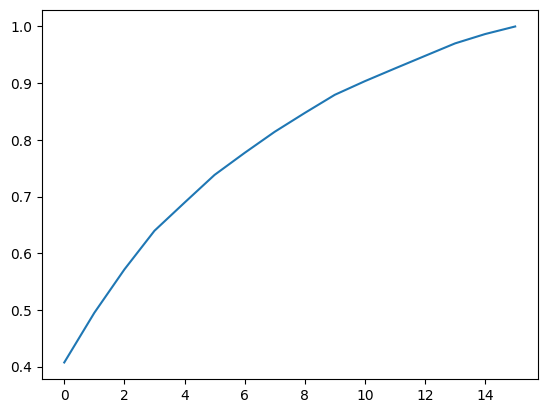

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/gdelt-2024-11-20-000000000000.csv', nrows=1000000)

actor1s = df['Actor1CountryCode'].unique()
actor2s = df['Actor2CountryCode'].unique()
props1ser = df['Actor1CountryCode'].value_counts(normalize=True)
props2ser = df['Actor2CountryCode'].value_counts(normalize=True)

# print(props2ser.head(20))

# plot sorted cumulative sum of actor2 country frequency by number of actor2 countries included
ser = props2ser
props = ser.array.to_numpy()
cum_sum = props.cumsum()
plt.plot(cum_sum)
# plt.show()

# get number of times certain actor1-actor2 pairs occur (top level is actor1)
num_keys = 15
num_rows = 10000
keys = list(props1ser.head(num_keys).keys())
keys.extend(list(props2ser.head(num_keys).keys()))
keys = list(set(keys))
mentions: dict[str, dict[str, int]] = dict((a1, dict((a2, 0) for a2 in keys)) for a1 in keys) # (actor1, (actor2, tally))
for index, row in df.head(num_rows).iterrows():
  if row['Actor1CountryCode'] in keys and row['Actor2CountryCode'] in keys:
    mentions[row['Actor1CountryCode']][row['Actor2CountryCode']] += 1
for k in keys:
  print(k, mentions[k])

popularity = [(k, sum(list(mentions[k].values()))) for k in keys]
popularity.sort(key=lambda x: x[1], reverse=True)
print(popularity)
print(list(map(lambda x: x[0], popularity)), len(popularity))

# Frequency.py

C:\Users\JeremiahA\AppData\Local\Temp\ipykernel_35320\4108153117.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(tick_labels)
C:\Users\JeremiahA\AppData\Local\Temp\ipykernel_35320\4108153117.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(tick_labels)


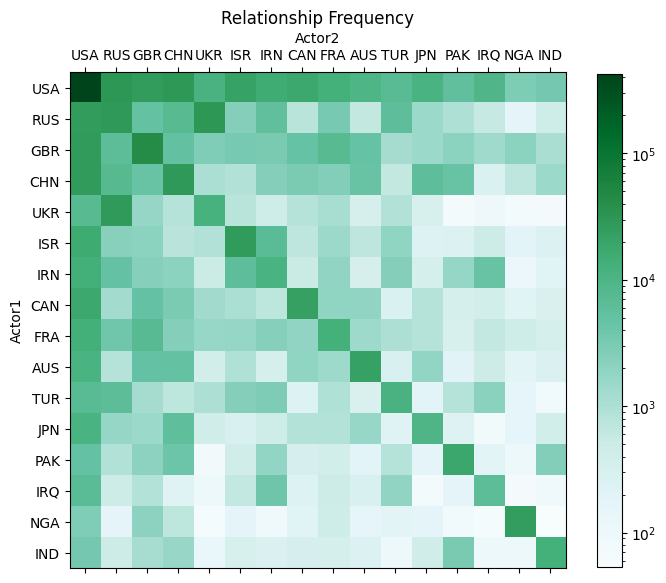

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.colors import LogNorm

df = pd.read_csv('data/gdelt-2024-11-20-000000000000.csv')[['Actor1CountryCode', 'Actor2CountryCode', 'AvgTone']]

actors = np.unique(np.concatenate((df['Actor1CountryCode'].unique(), df['Actor2CountryCode'].unique())))

connections = np.zeros((len(actors), len(actors)))
for i in range(len(actors)):
  for j in range(len(actors)):
    connections[i][j] = df.loc[(df['Actor1CountryCode'] == actors[i]) & (df['Actor2CountryCode'] == actors[j])].shape[0]

# get sort order
sums = np.zeros(len(actors))
for i in range(len(actors)):
  sums[i] = np.sum(connections[i,:]) + np.sum(connections[:,i]) - connections[i, i]
sums, order = zip(*sorted(zip(sums, range(len(actors))), reverse=True))
order = list(order)

# sort actors and connections
actors = actors[order]
connections = connections[:, order]
connections = connections[order, :]

tick_labels = np.insert(actors, 0, '')
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
mat = ax.matshow(connections, cmap=matplotlib.colormaps.get_cmap('BuGn'), norm=LogNorm())
ax.set_xticklabels(tick_labels)
ax.set_yticklabels(tick_labels)
ax.set_xlabel('Actor2')
ax.set_ylabel('Actor1')
ax.xaxis.set_label_position('top')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_title('Relationship Frequency')
fig.colorbar(mat, shrink=0.8)
# mat.set_clim(-4, 4)
plt.show()

# Media.py

Source
www.msn.com               26119
www.dailymail.co.uk       18731
news.yahoo.com            10902
www.yahoo.com              9352
www.washingtonpost.com     7274
                          ...  
mexicodailypost.com           1
raleightelegram.com           1
tristatehomepage.com          1
www.myballard.com             1
tennessee.rivals.com          1
Name: count, Length: 35486, dtype: int64


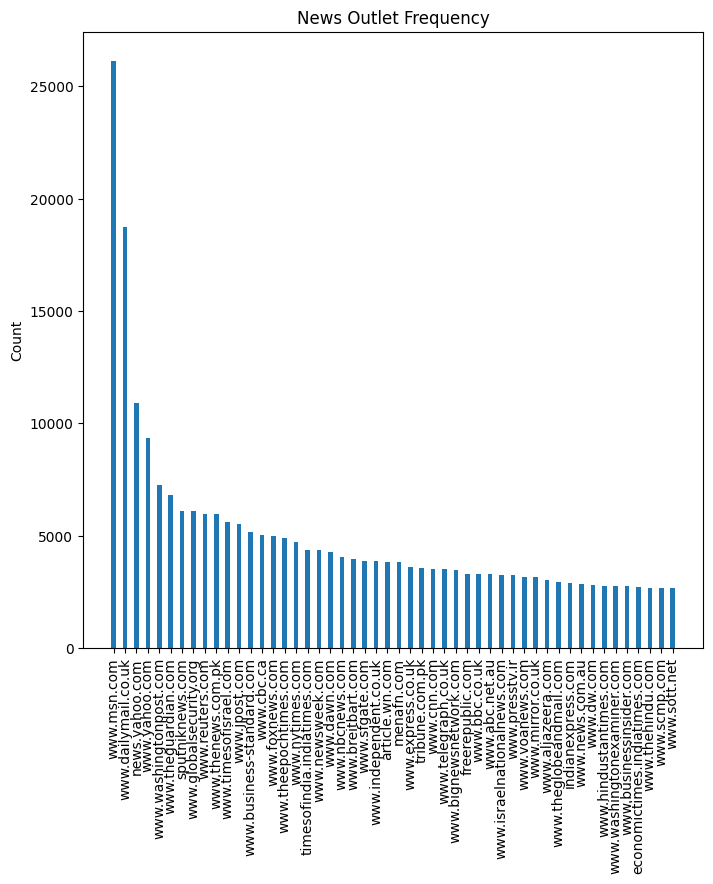

In [4]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df = pd.read_csv('data/gdelt-2024-11-20-000000000000.csv')[['GoldsteinScale', 'AvgTone', 'NumArticles', 'SOURCEURL']]

df['Source'] = df['SOURCEURL'].str.extract(r'(?<=:\/\/)(.*?)(?=\/)')
print(df['Source'].value_counts())
countsdf = df['Source'].value_counts()
sources = countsdf.index.to_numpy()
source_counts = countsdf.values

width = 0.4
num = 50
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.bar(sources[:num], source_counts[:num], width)
ax.set_ylabel('Count')
ax.set_title('News Outlet Frequency')
plt.xticks(rotation=90)
plt.show()

# Avgtone.py

C:\Users\JeremiahA\AppData\Local\Temp\ipykernel_35320\3519956729.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(tick_labels)
C:\Users\JeremiahA\AppData\Local\Temp\ipykernel_35320\3519956729.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(tick_labels)


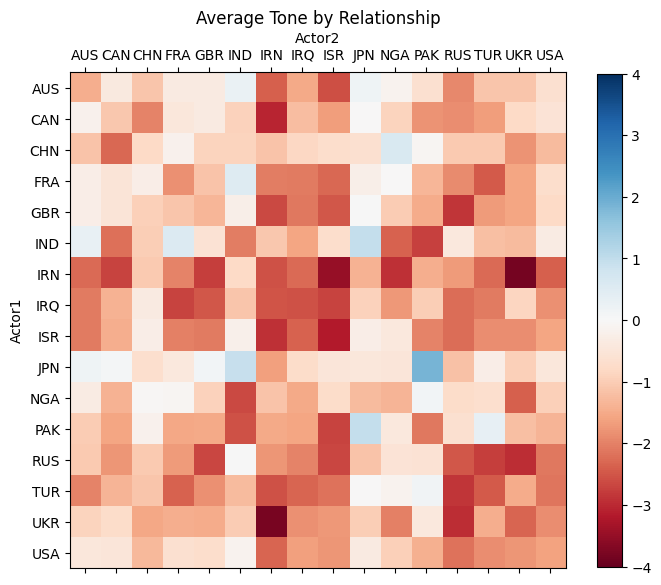

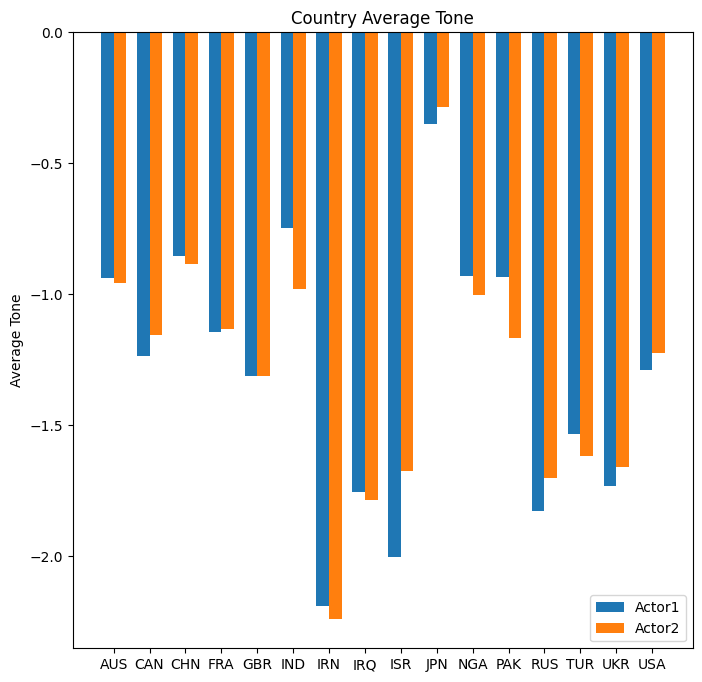

C:\Users\JeremiahA\AppData\Local\Temp\ipykernel_35320\3519956729.py:70: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(dates)


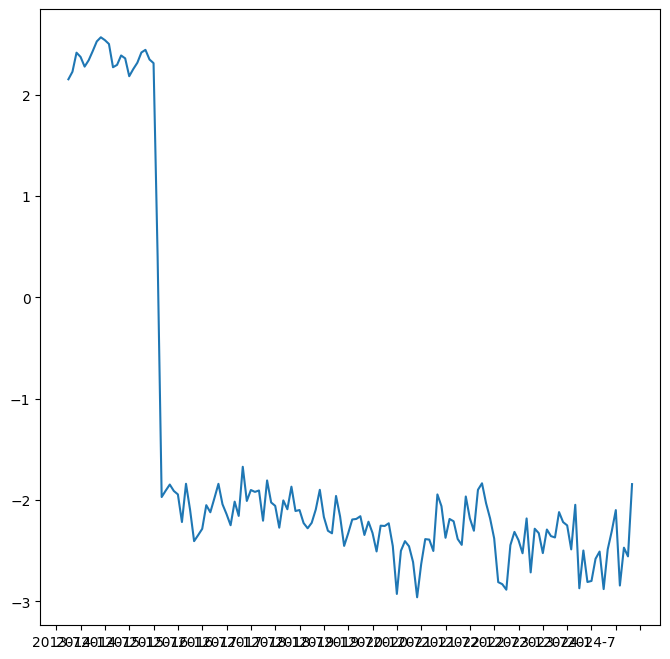

In [5]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df = pd.read_csv('data/gdelt-2024-11-20-000000000000.csv')[['SQLDATE', 'Actor1CountryCode', 'Actor2CountryCode', 'AvgTone']]

actors = np.unique(np.concatenate((df['Actor1CountryCode'].unique(), df['Actor2CountryCode'].unique())))

tones = np.zeros((len(actors), len(actors)))
for i in range(len(actors)):
  for j in range(len(actors)):
    tones[i][j] = df.loc[(df['Actor1CountryCode'] == actors[i]) & (df['Actor2CountryCode'] == actors[j])]['AvgTone'].mean()
tones = np.nan_to_num(tones)
avg_tones_a1 = np.mean(tones, axis=0)
avg_tones_a2 = np.mean(tones, axis=1)
avg_tones_all = np.sum(tones, axis=0) + np.sum(tones, axis=1)
for i in range(len(avg_tones_all)):
  avg_tones_all[i] -= tones[i][i]
avg_tones_all / len(avg_tones_all)

# average tone over time
df['DateTime'] = pd.to_datetime(df['SQLDATE'].astype(str), format='%Y%m%d')
time_tones = np.array([])
dates = np.array([])
year_min = df['DateTime'].dt.year.min()
year_max = df['DateTime'].dt.year.max()
for y in range(year_min, year_max + 1):
  for m in range(1, 13):
      found = df.loc[(df['DateTime'].dt.year == y) & (df['DateTime'].dt.month == m)]
      time_tones = np.append(time_tones, found['AvgTone'].mean())
      dates = np.append(dates, f"{y}-{m}")
  
# matrix of average tone for each relationship
tick_labels = np.insert(actors, 0, '')
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
mat = ax.matshow(tones, cmap=matplotlib.colormaps.get_cmap('RdBu'))
ax.set_xticklabels(tick_labels)
ax.set_yticklabels(tick_labels)
ax.set_xlabel('Actor2')
ax.set_ylabel('Actor1')
ax.xaxis.set_label_position('top')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_title('Average Tone by Relationship')
fig.colorbar(mat, shrink=0.8)
mat.set_clim(-4, 4)
plt.show()

# bar graph of country average tones by actor
width = 0.35
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
num = np.arange(len(actors))
rectsa1 = ax.bar(num - width/2, avg_tones_a1, width, label='Actor1')
rectsa2 = ax.bar(num + width/2, avg_tones_a2, width, label='Actor2')
ax.set_ylabel('Average Tone')
ax.set_title('Country Average Tone')
ax.set_xticks(num)
ax.set_xticklabels(actors)
ax.legend(loc='lower right')
plt.show()

# plot of average tone over time of news a country is involved in
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.plot(time_tones)
ax.set_xticklabels(dates)
ax.xaxis.set_major_locator(ticker.MultipleLocator(6))
formatter = ax.xaxis.get_major_formatter()
formatter.seq = formatter.seq[::6]
plt.show()

# Avg Tone of News Outlets Based on Country

C:\Users\JeremiahA\AppData\Local\Temp\ipykernel_35320\3080825820.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(tick_labels)
C:\Users\JeremiahA\AppData\Local\Temp\ipykernel_35320\3080825820.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(tick_labels)


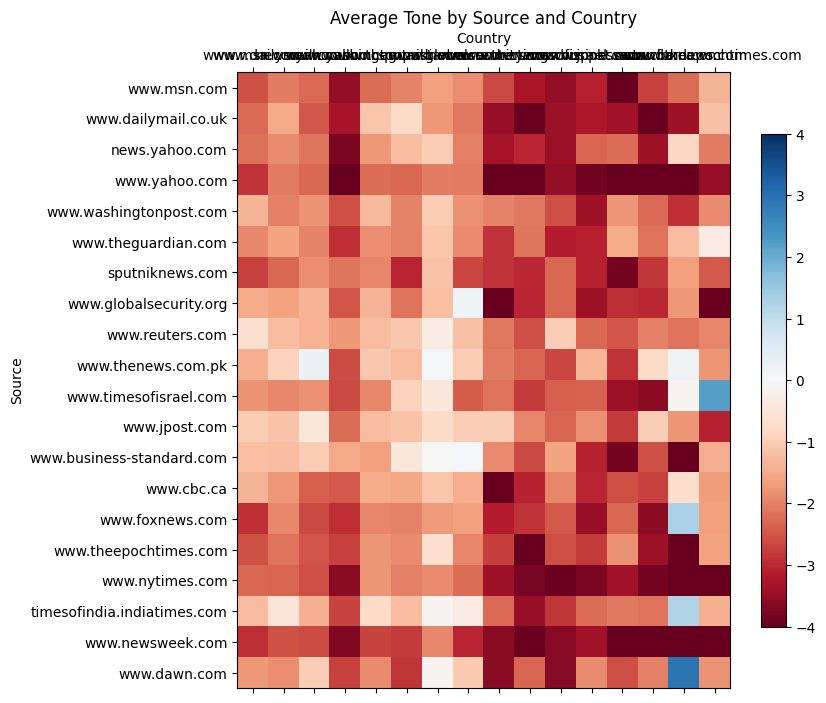

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df = pd.read_csv('data/gdelt-2024-11-20-000000000000.csv')[['AvgTone', 'SOURCEURL', 'Actor1CountryCode']]
df['Source'] = df['SOURCEURL'].str.extract(r'(?<=:\/\/)(.*?)(?=\/)')
df = df.drop(columns=['SOURCEURL'])

# Get the 20 most frequent sources
countsdf = df['Source'].value_counts()  
sources = countsdf.index.to_numpy()
source_counts = countsdf.values
sources = sources[:20]
source_counts = source_counts[:20]

# Group by source and country
df = df.groupby(['Source', 'Actor1CountryCode']).mean()
df = df.reset_index()

# Grab all the countries
countries = df['Actor1CountryCode'].unique()

# Create a matrix of average tone for each source and country
tones = np.zeros((len(sources), len(countries)))
for i in range(len(sources)):
  for j in range(len(countries)):
    tones[i][j] = df.loc[(df['Source'] == sources[i]) & (df['Actor1CountryCode'] == countries[j])]['AvgTone'].mean()
tones = np.nan_to_num(tones)

# Plot the matrix
tick_labels = np.insert(sources, 0, '')
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
mat = ax.matshow(tones, cmap=matplotlib.colormaps.get_cmap('RdBu'))
ax.set_xticklabels(tick_labels)
ax.set_yticklabels(countries)
ax.set_xlabel('Country')
ax.set_ylabel('Source')
ax.xaxis.set_label_position('top')
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_title('Average Tone by Source and Country')
fig.colorbar(mat, shrink=0.8)
mat.set_clim(-4, 4)
plt.show()